In [1]:
# To run:
# $ jupyter notebook

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
# Plot the figures inline and not in a pop-up
%matplotlib inline

colors = ['#581845', '#900C3F', '#C70039', '#FF5733', '#FFC300', '#DAF7A6']
#colors = ['indigo', 'mediumslateblue', 'cornflowerblue', 'teal',
#          'forestgreen', 'crimson', 'darkorange']

In [178]:
"""
Calculates the annual payment amount.
Args:
  * principal: the principal amount of the loan.
  * annual_interest_rate: the annual interest rate on the loan.
  * term_in_years: the number of years until the loan is paid.
Returns:
  * the monthly payment amount.
"""
def GetMonthlyPayment(principal, annual_interest_rate, term_in_years):
    annual_payment = (
        (principal * ((1.0 + annual_interest_rate)**term_in_years) *
         annual_interest_rate) /
        (((1.0 + annual_interest_rate)**term_in_years) - 1.0))
    return annual_payment / 12.0

In [179]:
# 0. Mortgage parameters.
loan_principal = 500000.0
loan_down_payment = 100000.0
annual_interest_rate = 0.05
loan_term_in_years = 30.0

# 0. One-time costs
one_time_costs = {
    'Down payment': loan_down_payment,
    'Closing costs': 3000.0,
    'Rehab budget': 10000.0,
    'Miscellaneous': 0.0
}

# 1. Monthly Income
monthly_income = {
    'Rent': 5500.0
}

# 2. Annual Expenses
annual_expenses = {
    'Property tax': 2600.0,
    'Property insurance': 1000.0,
    'HOA': 1000.0,
    'Mortgage insurance': 1000.0
}

# 2. Monthly Expenses
monthly_expenses = {
    'Utilies': 0.0,
    'Lawn care': 0.0,
    'Mortgage': GetMonthlyPayment(
        loan_principal, annual_interest_rate, loan_term_in_years)
}

# 2. Periodic Expenses: Capital Expenditures
# The format is ('name', period in years, dollar amount)
capital_expenditures = {
    ('Roof', 30, 20000.0),
    ('Water heater', 20, 6000.0),
    ('Paint', 2, 1000.0),
    ('Floors', 15, 10000.0),
    ('Heat/AC', 15, 8000.0)
}

# 2. Expenses Proportional to Rent
proportional_expenses = {
    'Vacancy': 0.05,
    'Property management': 0.10
}

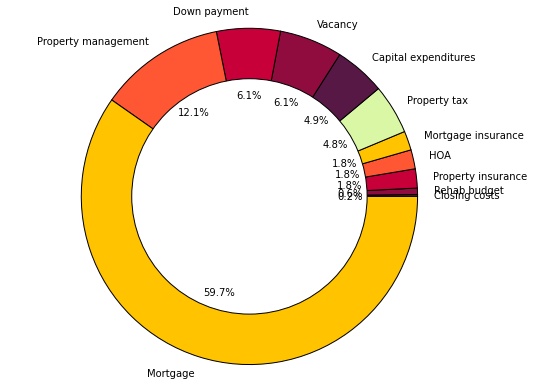

In [186]:
# 2. Total Monthly Expenses
total_expense_names = []
total_expense_values = []

# TODO(harda) factor in one-time expenses
#total_expense_names.append('One-time expenses')
for e in one_time_costs:
    if one_time_costs[e] == 0: continue
    total_expense_names.append(e)
    total_expense_values.append(one_time_costs[e] / (12.0 * loan_term_in_years))

for e in annual_expenses:
    if annual_expenses[e] == 0: continue
    total_expense_names.append(e)
    total_expense_values.append(annual_expenses[e] / 12.0)
for e in monthly_expenses:
    if monthly_expenses[e] == 0: continue
    total_expense_names.append(e)
    total_expense_values.append(monthly_expenses[e])
for e in proportional_expenses:
    if proportional_expenses[e] == 0: continue
    total_expense_names.append(e)
    total_expense_values.append(
        proportional_expenses[e] * monthly_income['Rent'])
total_expense_names.append('Capital expenditures')
total_expense_values.append(np.sum([e[2] / (12.0 * float(e[1])) for e in capital_expenditures]))
for e in capital_expenditures:
    if e[2] == 0: continue
    #total_expense_names.append(e[0])
    #total_expense_values.append(e[2] / (12.0 * float(e[1])))
    
vals = [list(x) for x in zip(
        *sorted(zip(total_expense_values, total_expense_names),
                key=lambda pair: pair[0]))
]
total_expense_values = vals[0]
total_expense_names = vals[1]

# Plot a pie chart of expenses
fig, ax = plt.subplots(figsize=(7,5))
explode = [0.0] * len(total_expense_names)
ax.pie(total_expense_values, labels=total_expense_names,
       autopct='%1.1f%%', shadow=False, startangle=0,
       colors=colors, explode=explode)
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.tight_layout()
plt.show()

In [184]:
monthly_total_income = np.sum([monthly_income[e] for e in monthly_income])
monthly_total_expenses = np.sum(total_expense_values)

# 3. Cash Flow
monthly_cash_flow = monthly_total_income - monthly_total_expenses
annual_cash_flow = monthly_cash_flow * 12.0
print('Monthly total cashflow = $%2.2f' % monthly_cash_flow)
print('Annual total cashflow = $%2.2f' % annual_cash_flow)

# 4. Cash on Cash RoI
total_investment = np.sum([one_time_costs[e] for e in one_time_costs])
print('\nTotal investment = $%2.2f' % total_investment)

annual_roi = annual_cash_flow / total_investment
print('\nAnnual RoI = %2.2f%%' % (100.0 * annual_roi))


Monthly total cashflow = $961.75
Annual total cashflow = $11540.95

Total investment = $113000.00

Annual RoI = 10.21%
